## Jupyter notebook for quality checking the RNA-seq data 
This notebook is the code for illustrating gene expression time course profiles from the RNA-seq data used in the paper **"Simultaneous analysis of open chromatin, promoter interactions and gene expression in stimulated T cells implicates causal genes for rheumatoid arthritis"** by Jing Yang, Amanda McGovern, Paul Martin, Kate Duffus, Peyman Zarrineh, Andrew P Morris, Antony Adamson, Peter Fraser, Magnus Rattray & Stephen Eyre, based on categories set in the paper from Ye, Chun Jimmie, et al. **"Intersection of population variation and autoimmunity genetics in human T cell activation." Science 345.6202 (2014): 1254665**.

Author : *Jing Yang*  <br />
Date: 24-10-2019 <br />
For any questions about the code, please drop me a line at Jing.Yang@manchester.ac.uk

### load package

In [1]:
library(ggplot2)
library(reshape2)
library(plyr)

### read the normalized RNA-seq data

In [2]:
data <- read.table('data/gene_normalized.csv', sep=',', header=T)

### standardized the data

In [3]:
idx_rep1 <- c('T01','T201','T601','T2H1','T4H1','T24H1')
idx_rep2 <- c('T02','T202','T602','T2H2','T4H2','T24H2')


In [4]:
data_averaged <- 0.5*(data[,idx_rep1] + data[,idx_rep2])
data_standardized <- t(scale(t(data_averaged), center=T, scale=T))
data_standardized_withENSG <- cbind(data[,1:4], data_standardized)
names(data_standardized_withENSG) <- gsub('1$','',names(data_standardized_withENSG))


### get gene list from Ye's paper

In [5]:
Early_genes_fromYe <- read.table('data/Early_genes.txt', header=T)
Late_genes_fromYe <- read.table('data/Late_genes.txt', header=T)
Intermediate_I_genes_fromYe <- read.table('data/IntermediateI_genes.txt', header=T)
Intermediate_II_genes_fromYe <- read.table('data/IntermediateII_genes.txt', header=T)
Repressed_genes_fromYe <- read.table('data/Repressed_genes.txt', header=T)


In [6]:
Early_data <- merge(Early_genes_fromYe, data_standardized_withENSG)
IntermediateI_data <- merge(Intermediate_I_genes_fromYe, data_standardized_withENSG)
IntermediateII_data <- merge(Intermediate_II_genes_fromYe, data_standardized_withENSG)
Late_data <- merge(Late_genes_fromYe, data_standardized_withENSG)
Repressed_data <- merge(Repressed_genes_fromYe, data_standardized_withENSG)

Early_data$label <- 'Early induced'
IntermediateI_data$label <- 'Intermediate induced I'
IntermediateII_data$label <- 'Intermediate induced II'
Late_data$label <- 'Late induced'
Repressed_data$label <- 'Persistent Repressed'


In [7]:
data_combined <- rbind(Early_data, IntermediateI_data, IntermediateII_data, Late_data, Repressed_data)

### show the data and associated mean and errorbars

Using ENSG, label as id variables



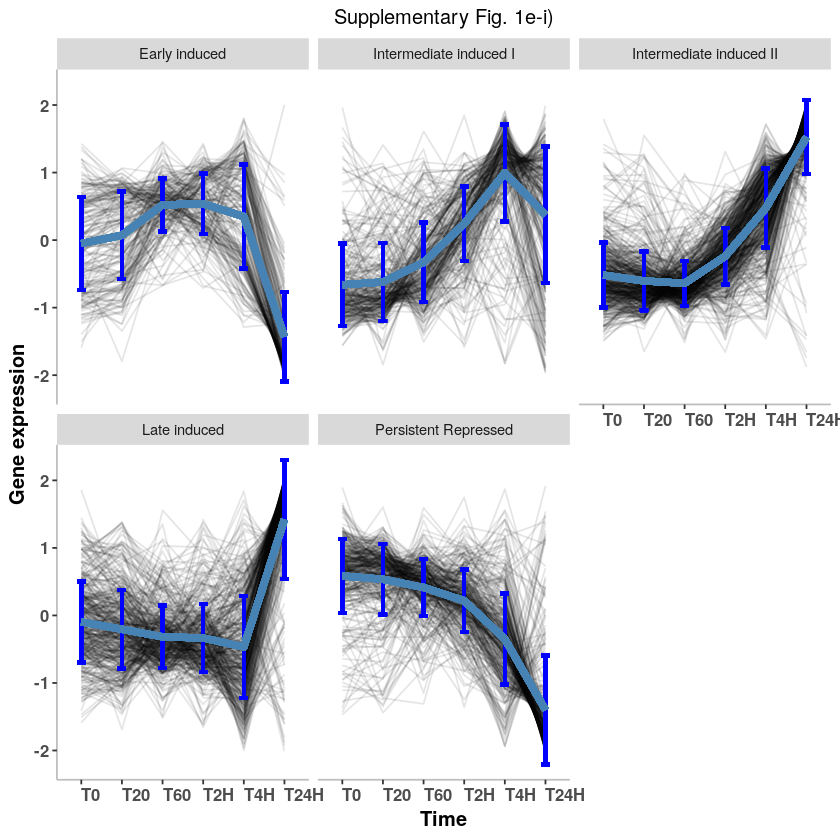

In [8]:
data_melted <- melt(data_combined[,c(1,5:11)])
data_melted$var2 <- paste(data_melted$variable, data_melted$label)

data_combined_stat <- ddply(data_melted, 'var2', summarise,mean = mean(value), sd = sd(value))
data_combined_withstat <- merge(data_melted, data_combined_stat)

ggplot(data=data_combined_withstat, aes(variable, value, group=ENSG)) +
  geom_line(alpha=0.1) +
  geom_errorbar(aes(x=variable, ymin= mean-sd, ymax=mean+sd),width=0.2, size=1, color="blue") +
  geom_line(aes(x=variable, y=mean),color='steelblue', size=2 ) + 
  xlab('Time') + ylab('Gene expression') +
  theme(
  panel.border = element_blank(),  
  panel.grid.major = element_blank(),
  panel.grid.minor = element_blank(),
  panel.background = element_blank(),
  axis.line = element_line(colour = "grey"),
  legend.title = element_text(size = 12),
        legend.text = element_text(size = 12),
        plot.title = element_text(hjust=0.5,size=12),
        axis.title=element_text(size=12,face="bold"),
        axis.text.x = element_text(angle = 0, hjust = 0, size=10, face="bold"),
        axis.text.y = element_text(size=10, face="bold")
  ) +
  labs(fill = "value")  + ggtitle('Supplementary Fig. 1e-i)') + facet_wrap(label ~.)
